<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [0]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-05-07 19:29:42.506509


In [0]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [0]:
def state_chart(deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

In [0]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [0]:
# All States
states = pop['State'].tolist()
states.sort()

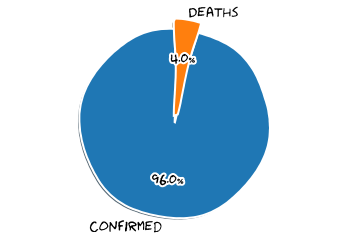

Alabama State Total Population
4887871
Alabama State Confirmed
8763 (0.1792805088350327% of population)
Alabama State Deaths
349 (3.982654342120279% of confirmed)



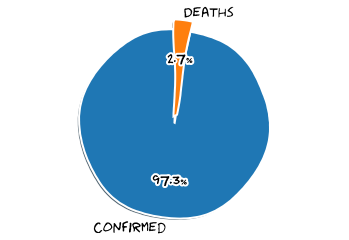

Alaska State Total Population
737438
Alaska State Confirmed
372 (0.05044491875927197% of population)
Alaska State Deaths
10 (2.6881720430107525% of confirmed)



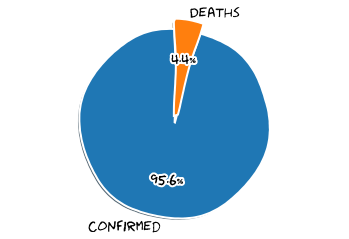

Arizona State Total Population
7171646
Arizona State Confirmed
9707 (0.13535246999085007% of population)
Arizona State Deaths
425 (4.378283712784588% of confirmed)



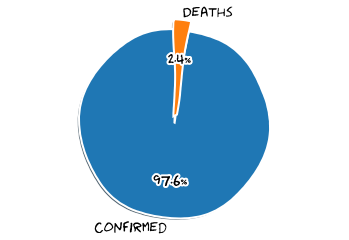

Arkansas State Total Population
3013825
Arkansas State Confirmed
3611 (0.11981452141381799% of population)
Arkansas State Deaths
87 (2.4093049016892825% of confirmed)



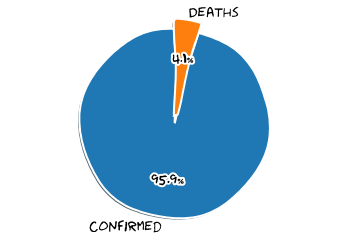

California State Total Population
39557045
California State Confirmed
60616 (0.15323692657022284% of population)
California State Deaths
2462 (4.061633892041705% of confirmed)



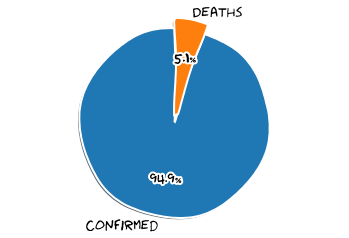

Colorado State Total Population
5695564
Colorado State Confirmed
17832 (0.3130857628849399% of population)
Colorado State Deaths
917 (5.142440556303275% of confirmed)



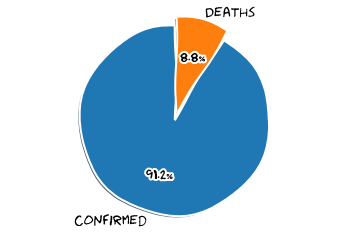

Connecticut State Total Population
3572665
Connecticut State Confirmed
30995 (0.8675596508488761% of population)
Connecticut State Deaths
2718 (8.769156315534763% of confirmed)



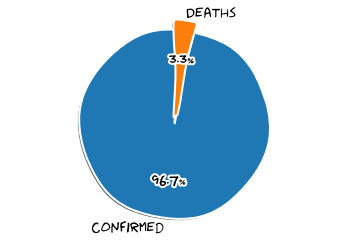

Delaware State Total Population
967171
Delaware State Confirmed
5778 (0.5974124534337775% of population)
Delaware State Deaths
193 (3.340256143994462% of confirmed)



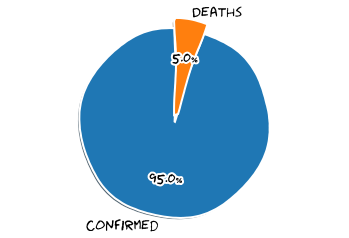

District of Columbia State Total Population
702455
District of Columbia State Confirmed
5654 (0.8048914165320199% of population)
District of Columbia State Deaths
285 (5.040679165192784% of confirmed)



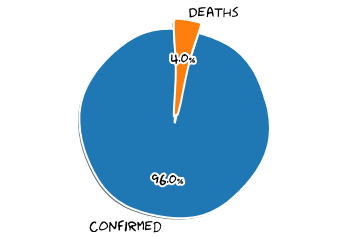

Florida State Total Population
21299325
Florida State Confirmed
38002 (0.17841879965679663% of population)
Florida State Deaths
1539 (4.04978685332351% of confirmed)



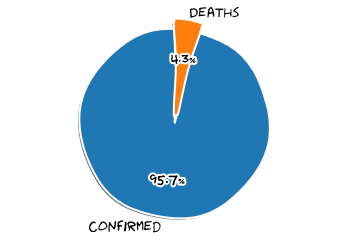

Georgia State Total Population
10519475
Georgia State Confirmed
31141 (0.2960318837204328% of population)
Georgia State Deaths
1325 (4.254840885006904% of confirmed)



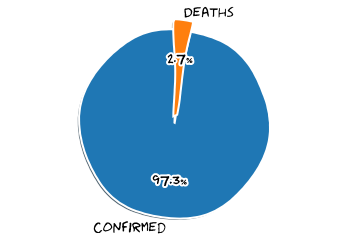

Hawaii State Total Population
1420491
Hawaii State Confirmed
626 (0.04406926900628022% of population)
Hawaii State Deaths
17 (2.7156549520766773% of confirmed)



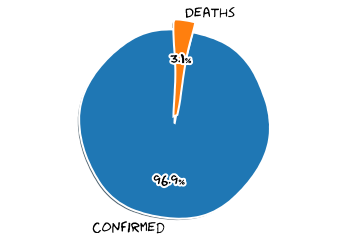

Idaho State Total Population
1754208
Idaho State Confirmed
2158 (0.1230184789945092% of population)
Idaho State Deaths
66 (3.0583873957367933% of confirmed)



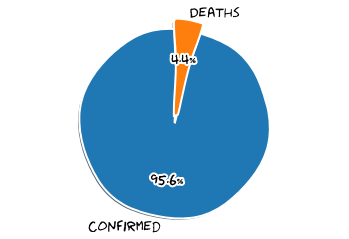

Illinois State Total Population
12741080
Illinois State Confirmed
68232 (0.535527600485987% of population)
Illinois State Deaths
2974 (4.35865869386798% of confirmed)



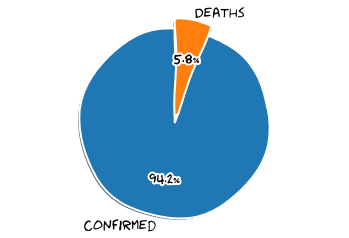

Indiana State Total Population
6691878
Indiana State Confirmed
21870 (0.32681408716656224% of population)
Indiana State Deaths
1264 (5.779606767261089% of confirmed)



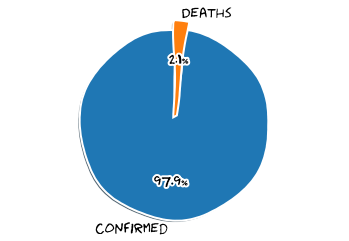

Iowa State Total Population
3156145
Iowa State Confirmed
10404 (0.32964264949804273% of population)
Iowa State Deaths
219 (2.1049596309111878% of confirmed)



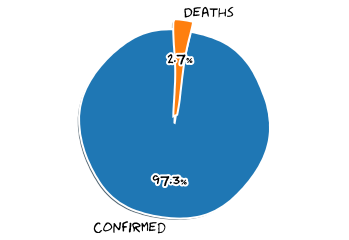

Kansas State Total Population
2911510
Kansas State Confirmed
6043 (0.2075555296049129% of population)
Kansas State Deaths
164 (2.7138838325335097% of confirmed)



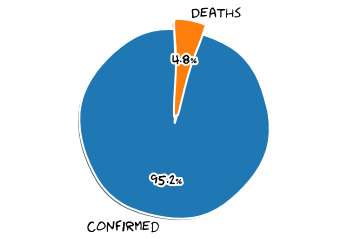

Kentucky State Total Population
4468402
Kentucky State Confirmed
5934 (0.13279915280675283% of population)
Kentucky State Deaths
283 (4.769127064374789% of confirmed)



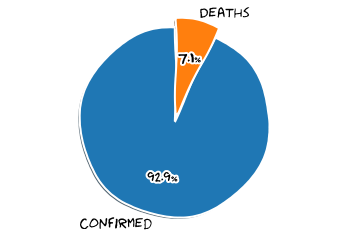

Louisiana State Total Population
4659978
Louisiana State Confirmed
30399 (0.6523421355208114% of population)
Louisiana State Deaths
2167 (7.128523964604098% of confirmed)



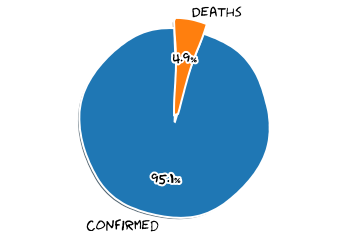

Maine State Total Population
1338404
Maine State Confirmed
1254 (0.09369368292384063% of population)
Maine State Deaths
62 (4.944178628389154% of confirmed)



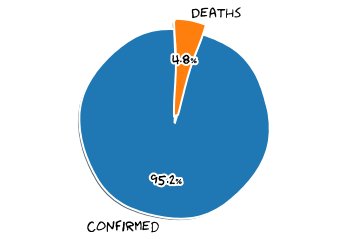

Maryland State Total Population
6042718
Maryland State Confirmed
29374 (0.48610575572118375% of population)
Maryland State Deaths
1408 (4.793354667392932% of confirmed)



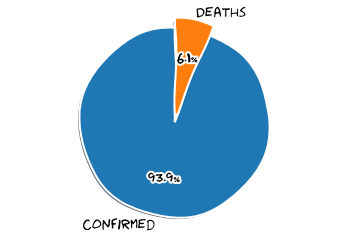

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
72025 (1.043515577539691% of population)
Massachusetts State Deaths
4420 (6.136758070114544% of confirmed)



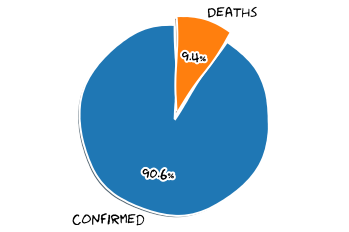

Michigan State Total Population
9995915
Michigan State Confirmed
45179 (0.4519746316370237% of population)
Michigan State Deaths
4256 (9.420305894331438% of confirmed)



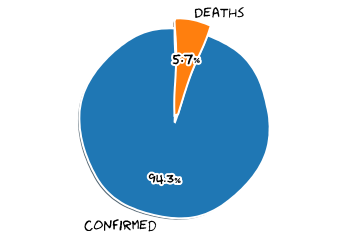

Minnesota State Total Population
5611179
Minnesota State Confirmed
8579 (0.1528912194745525% of population)
Minnesota State Deaths
485 (5.65333955006411% of confirmed)



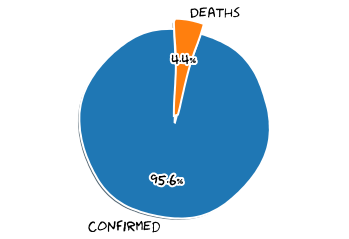

Mississippi State Total Population
2986530
Mississippi State Confirmed
8424 (0.28206647848841293% of population)
Mississippi State Deaths
374 (4.439696106362773% of confirmed)



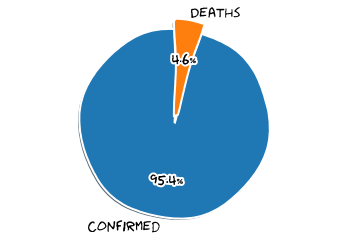

Missouri State Total Population
6126452
Missouri State Confirmed
9399 (0.15341669207560918% of population)
Missouri State Deaths
428 (4.553675922970529% of confirmed)



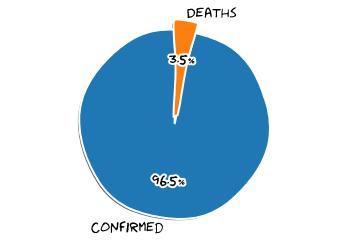

Montana State Total Population
1062305
Montana State Confirmed
456 (0.04292552515520496% of population)
Montana State Deaths
16 (3.508771929824561% of confirmed)



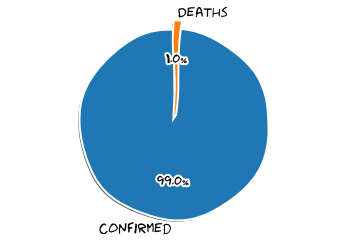

Nebraska State Total Population
1929268
Nebraska State Confirmed
6689 (0.34671180986778405% of population)
Nebraska State Deaths
67 (1.0016444909552997% of confirmed)



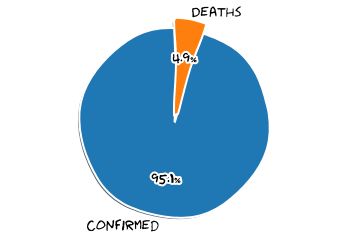

Nevada State Total Population
3034392
Nevada State Confirmed
5744 (0.1892965707792533% of population)
Nevada State Deaths
280 (4.874651810584958% of confirmed)



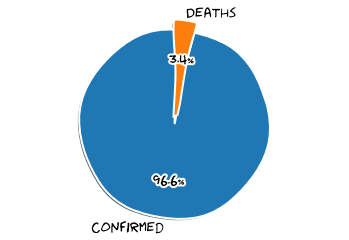

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
2741 (0.2020703921536826% of population)
New Hampshire State Deaths
92 (3.3564392557460776% of confirmed)



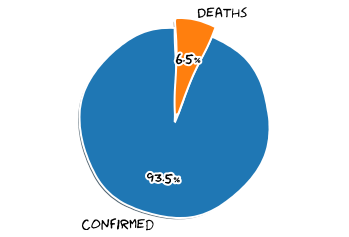

New Jersey State Total Population
8908520
New Jersey State Confirmed
131890 (1.4804928315814525% of population)
New Jersey State Deaths
8549 (6.481916748805823% of confirmed)



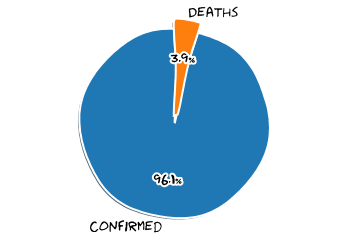

New Mexico State Total Population
2095428
New Mexico State Confirmed
4291 (0.20477916683369699% of population)
New Mexico State Deaths
169 (3.9384758797483106% of confirmed)



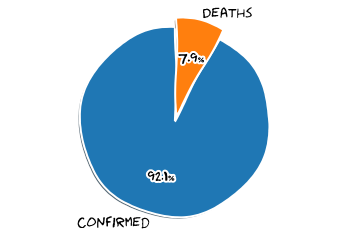

New York State Total Population
19542209
New York State Confirmed
323978 (1.657837146250969% of population)
New York State Deaths
25623 (7.908870355394503% of confirmed)



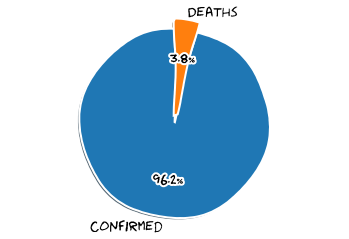

North Carolina State Total Population
10383620
North Carolina State Confirmed
13053 (0.12570760486227348% of population)
North Carolina State Deaths
492 (3.7692484486324984% of confirmed)



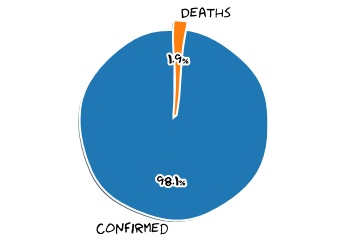

North Dakota State Total Population
760077
North Dakota State Confirmed
1323 (0.17406131220915774% of population)
North Dakota State Deaths
25 (1.889644746787604% of confirmed)



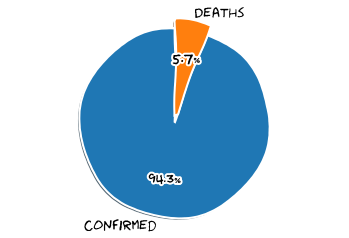

Ohio State Total Population
11689442
Ohio State Confirmed
21576 (0.18457681726809544% of population)
Ohio State Deaths
1225 (5.67760474601409% of confirmed)



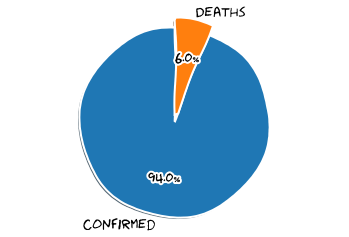

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
4202 (0.10656646747376859% of population)
Oklahoma State Deaths
253 (6.020942408376963% of confirmed)



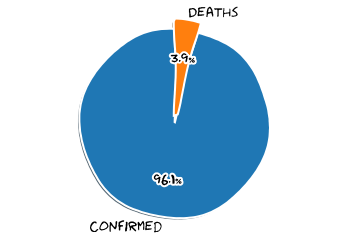

Oregon State Total Population
4190713
Oregon State Confirmed
2916 (0.06958243143827793% of population)
Oregon State Deaths
115 (3.943758573388203% of confirmed)



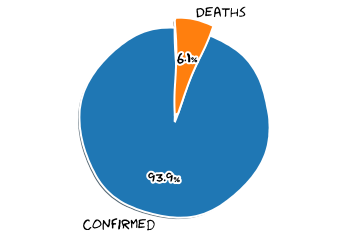

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
54800 (0.42788899247758655% of population)
Pennsylvania State Deaths
3345 (6.104014598540146% of confirmed)



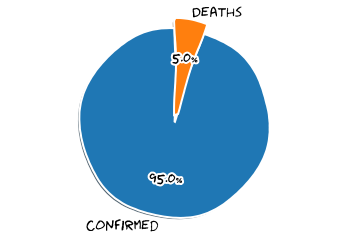

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
2031 (0.06356503115813233% of population)
Puerto Rico State Deaths
102 (5.022156573116692% of confirmed)



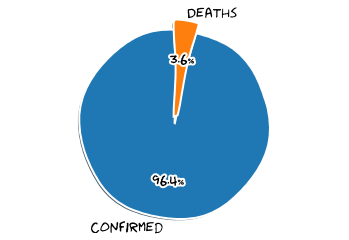

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
10205 (0.9651806699044277% of population)
Rhode Island State Deaths
370 (3.6256736893679564% of confirmed)



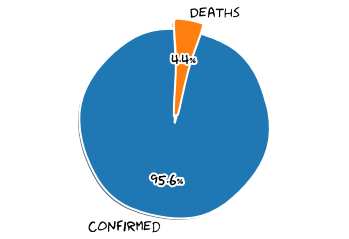

South Carolina State Total Population
5084127
South Carolina State Confirmed
6936 (0.13642460150975771% of population)
South Carolina State Deaths
305 (4.397347174163784% of confirmed)



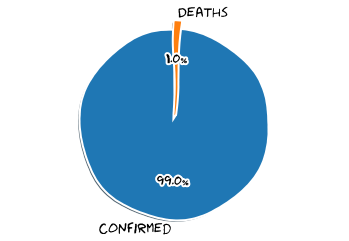

South Dakota State Total Population
882235
South Dakota State Confirmed
2780 (0.3151087862077564% of population)
South Dakota State Deaths
29 (1.0431654676258995% of confirmed)



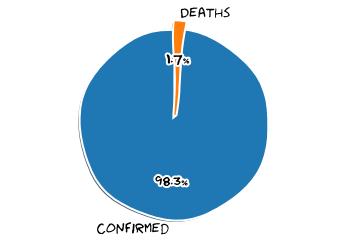

Tennessee State Total Population
6770010
Tennessee State Confirmed
13938 (0.20587857329605128% of population)
Tennessee State Deaths
239 (1.7147366910604103% of confirmed)



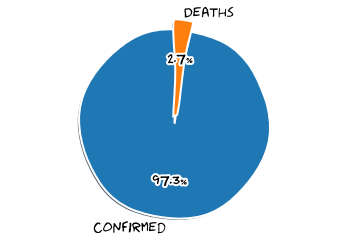

Texas State Total Population
28701845
Texas State Confirmed
34928 (0.12169252534114097% of population)
Texas State Deaths
954 (2.7313330279431973% of confirmed)



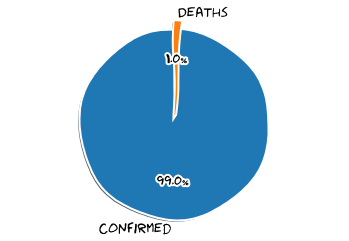

Utah State Total Population
3161105
Utah State Confirmed
5531 (0.1749704612785719% of population)
Utah State Deaths
57 (1.030555053335744% of confirmed)



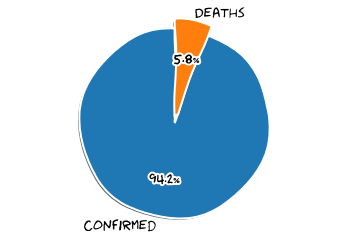

Vermont State Total Population
626299
Vermont State Confirmed
916 (0.14625602148494568% of population)
Vermont State Deaths
53 (5.786026200873363% of confirmed)



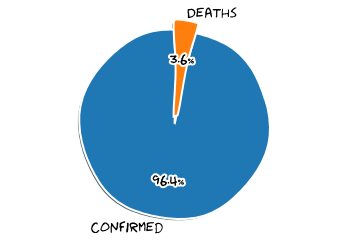

Virginia State Total Population
8517685
Virginia State Confirmed
21636 (0.25401268067555915% of population)
Virginia State Deaths
774 (3.577371048252912% of confirmed)



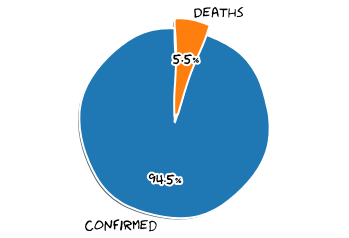

Washington State Total Population
7535591
Washington State Confirmed
15905 (0.21106506443887416% of population)
Washington State Deaths
870 (5.469977994341402% of confirmed)



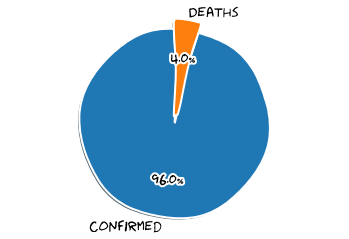

West Virginia State Total Population
1805832
West Virginia State Confirmed
1242 (0.06877716199513575% of population)
West Virginia State Deaths
50 (4.025764895330113% of confirmed)



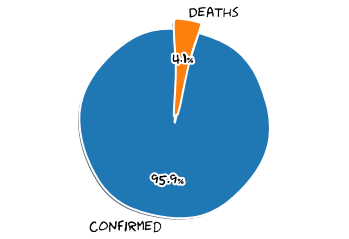

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
8901 (0.15310735162984246% of population)
Wisconsin State Deaths
362 (4.066958768677677% of confirmed)



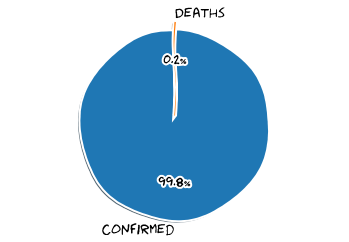

Wyoming State Total Population
577737
Wyoming State Confirmed
631 (0.10921924681991978% of population)
Wyoming State Deaths
1 (0.15847860538827258% of confirmed)



In [9]:
us = pd.DataFrame.from_dict(us_confirmed.json())

for i in states:
    state_details(i)

In [10]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
1231992
US Deaths
73328

New York City Confirmed
178351
New York City Deaths
19174

Philippines Confirmed
10343
Philippines Deaths
685



In [11]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 3813123},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 267233},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-05-07T18:32:31.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 1266047},
 'source': 'https://github.com/mathdroid/covid19'}

In [0]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [13]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey
0,45001,Abbeville,South Carolina,US,2020-05-07 02:32:28,34.22333378,-82.46170658,33,0,0,33,"Abbeville, South Carolina, US"
1,22001,Acadia,Louisiana,US,2020-05-07 02:32:28,30.295064899999996,-92.41419698,140,10,0,130,"Acadia, Louisiana, US"
2,51001,Accomack,Virginia,US,2020-05-07 02:32:28,37.76707161,-75.63234615,429,7,0,422,"Accomack, Virginia, US"
3,16001,Ada,Idaho,US,2020-05-07 02:32:28,43.4526575,-116.24155159999998,717,19,0,698,"Ada, Idaho, US"
4,19001,Adair,Iowa,US,2020-05-07 02:32:28,41.33075609,-94.47105874,3,0,0,3,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,,,,West Bank and Gaza,2020-05-07 02:32:28,31.9522,35.2332,374,2,174,198,West Bank and Gaza
3212,,,,Western Sahara,2020-05-07 02:32:28,24.2155,-12.8858,6,0,5,1,Western Sahara
3213,,,,Yemen,2020-05-07 02:32:28,15.552726999999999,48.516388,25,5,1,19,Yemen
3214,,,,Zambia,2020-05-07 02:32:28,-13.133897,27.849332,146,4,101,41,Zambia


In [14]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1588865554000,40.767273,-73.971526,178351,0,19174,159177,New York City,36061,"New York City, New York, US",2139.317680,None,None,84036061,USA
1,Illinois,US,1588865554000,41.841448,-87.816588,46689,0,2004,44685,Cook,17031,"Cook, Illinois, US",906.541510,None,None,84017031,USA
2,New York,US,1588865554000,40.740665,-73.589419,37350,0,1891,35459,Nassau,36059,"Nassau, New York, US",2752.549148,None,None,84036059,USA
3,New York,US,1588865554000,40.883201,-72.801217,35543,0,1522,34021,Suffolk,36103,"Suffolk, New York, US",2407.082211,None,None,84036103,USA
4,New York,US,1588865554000,41.162784,-73.757417,30426,0,1167,29259,Westchester,36119,"Westchester, New York, US",3144.786699,None,None,84036119,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,West Virginia,US,1588865554000,37.612327,-81.545111,1,0,0,1,Wyoming,54109,"Wyoming, West Virginia, US",4.903403,None,None,84054109,USA
2884,North Carolina,US,1588865554000,35.900792,-82.312372,1,0,0,1,Yancey,37199,"Yancey, North Carolina, US",5.534341,None,None,84037199,USA
2885,Alaska,US,1588865554000,65.508155,-151.390739,1,0,0,1,Yukon-Koyukuk,02290,"Yukon-Koyukuk, Alaska, US",19.120459,None,None,84002290,USA
2886,Texas,US,1588865554000,28.866172,-99.760508,1,0,0,1,Zavala,48507,"Zavala, Texas, US",8.445946,None,None,84048507,USA


In [15]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1588865554000,40.767273,-73.971526,178351,0,19174,159177,New York City,36061,"New York City, New York, US",2139.317680,None,None,84036061,USA
2,New York,US,1588865554000,40.740665,-73.589419,37350,0,1891,35459,Nassau,36059,"Nassau, New York, US",2752.549148,None,None,84036059,USA
3,New York,US,1588865554000,40.883201,-72.801217,35543,0,1522,34021,Suffolk,36103,"Suffolk, New York, US",2407.082211,None,None,84036103,USA
4,New York,US,1588865554000,41.162784,-73.757417,30426,0,1167,29259,Westchester,36119,"Westchester, New York, US",3144.786699,None,None,84036119,USA
18,New York,US,1588865554000,41.150279,-74.025605,12204,0,551,11653,Rockland,36087,"Rockland, New York, US",3745.982829,None,None,84036087,USA
20,New York,US,1588865554000,41.403375,-74.302408,9215,0,358,8857,Orange,36071,"Orange, New York, US",2393.879566,None,None,84036071,USA
55,New York,US,1588865554000,42.762490,-78.730637,4008,0,323,3685,Erie,36029,"Erie, New York, US",436.267691,None,None,84036029,USA
67,New York,US,1588865554000,41.764861,-73.743567,3192,0,40,3152,Dutchess,36027,"Dutchess, New York, US",1084.909829,None,None,84036027,USA
113,New York,US,1588865554000,43.146389,-77.693229,1655,0,137,1518,Monroe,36055,"Monroe, New York, US",223.114982,None,None,84036055,USA
131,New York,US,1588865554000,41.890279,-74.262521,1383,0,49,1334,Ulster,36111,"Ulster, New York, US",778.834620,None,None,84036111,USA


In [16]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

323978

In [17]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1588865554000,40.767273,-73.971526,178351,0,19174,159177,New York City,36061,"New York City, New York, US",2139.31768,None,None,84036061,USA


In [18]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
58,None,Philippines,1588876351000,12.879721,121.774017,10343,1618,685,8040,None,None,Philippines,9.438673,None,None,608,PHL,PH


In [19]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
